# Seaborn Exercises

<hr style="border:2px solid gray">

Create a file named seaborn_exercises.py or seaborn_exercises.ipynb for this exercise.

In [1]:
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import warnings
# warnings.filterwarnings("ignore")

In [2]:
iris = sns.load_dataset('iris')

Use the iris database to answer the following quesitons:

1. What does the distribution of petal lengths look like?

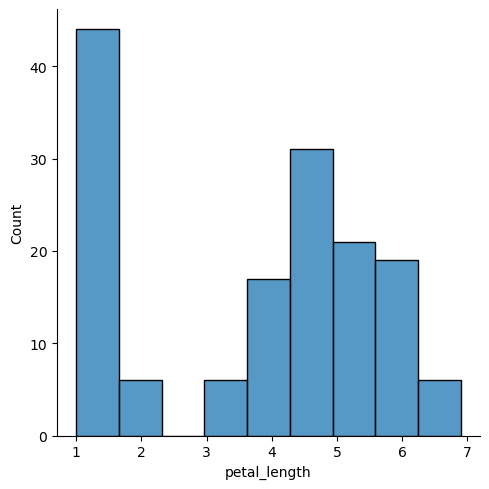

In [3]:
sns.displot(iris.petal_length)

2. Is there a correlation between petal length and petal width?

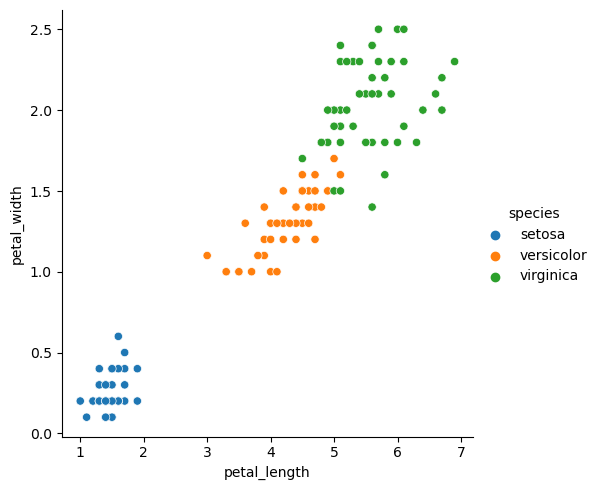

In [4]:
sns.relplot(data = iris, x = 'petal_length', y = 'petal_width', hue = 'species')

3. Would it be reasonable to predict species based on sepal width and sepal length?

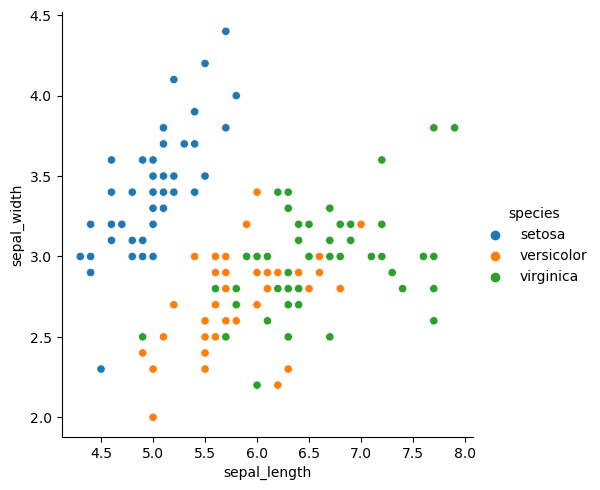

In [5]:
sns.relplot(data = iris, x = 'sepal_length', y = 'sepal_width', hue = 'species')

4. Which features would be best used to predict species?

<Axes: xlabel='species', ylabel='petal_width'>

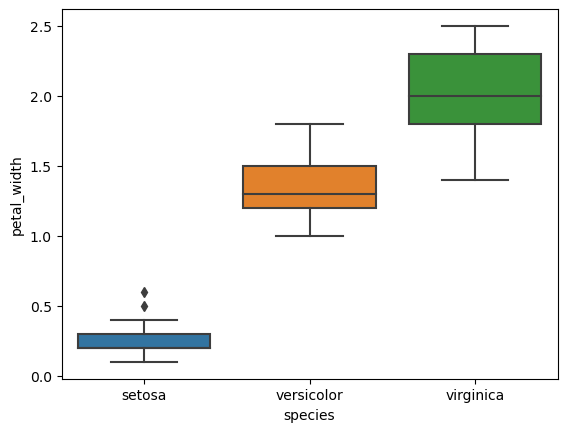

In [6]:
sns.boxplot(y = 'petal_width', x = 'species', data = iris)

1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set.

In [7]:
df = sns.load_dataset('anscombe')

Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

In [8]:

df.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

* Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

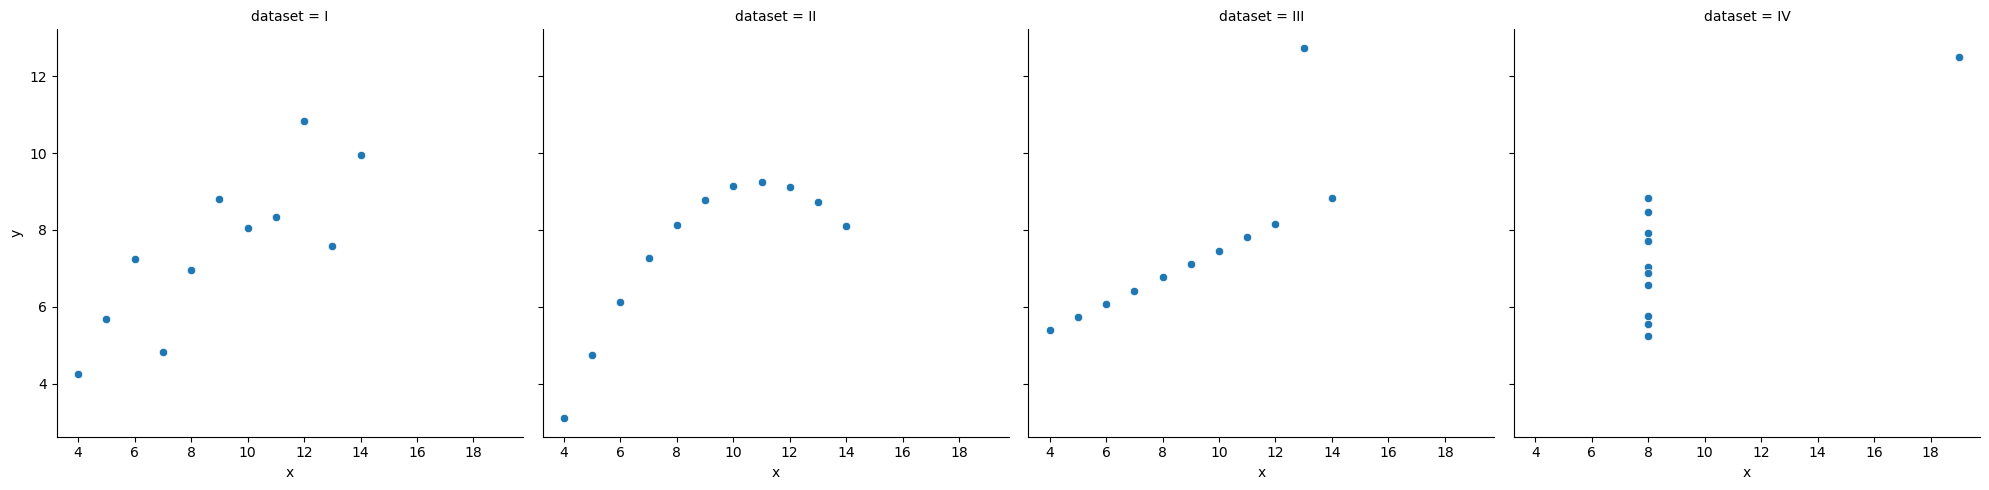

In [9]:
sns.relplot(data = df, x = 'x', y = 'y', col = 'dataset')

2. Load the InsectSprays dataset and read it's documentation.

In [10]:
InsectSprays = data('InsectSprays')
data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

Create a boxplot that shows the effectiveness of the different insect sprays.

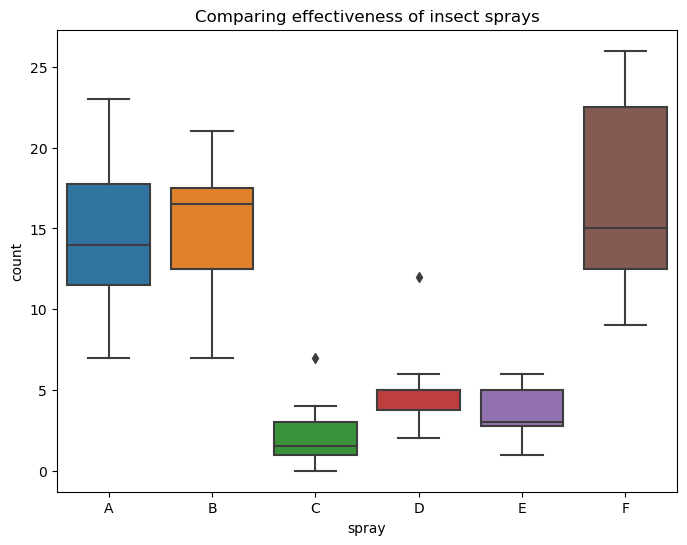

In [11]:
plt.figure(figsize=(8, 6))
sns.boxplot(y = 'count', data = InsectSprays, x = 'spray')
plt.title('Comparing effectiveness of insect sprays')
plt.show()

3. Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:

In [12]:
swiss = data('swiss')
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [13]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [14]:
swiss['is_catholic'] = swiss.Catholic > 50

Does whether or not a province is Catholic influence fertility?

<Axes: xlabel='is_catholic', ylabel='Fertility'>

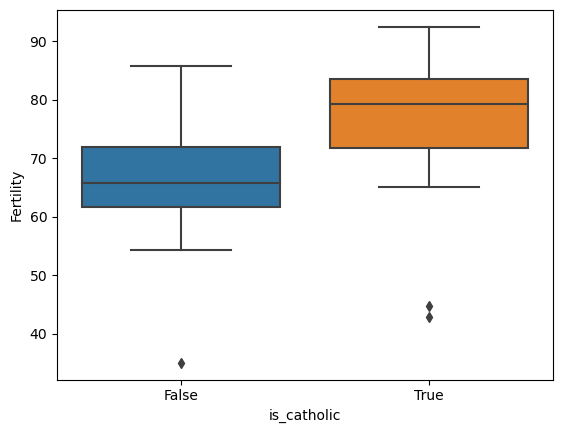

In [15]:
sns.boxplot(x = 'is_catholic', y = 'Fertility', data = swiss)

What measure correlates most strongly with fertility?

In [16]:
#Drop boolean column to prepare for pairplot
swiss.drop(columns=['is_catholic'], inplace=True)
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


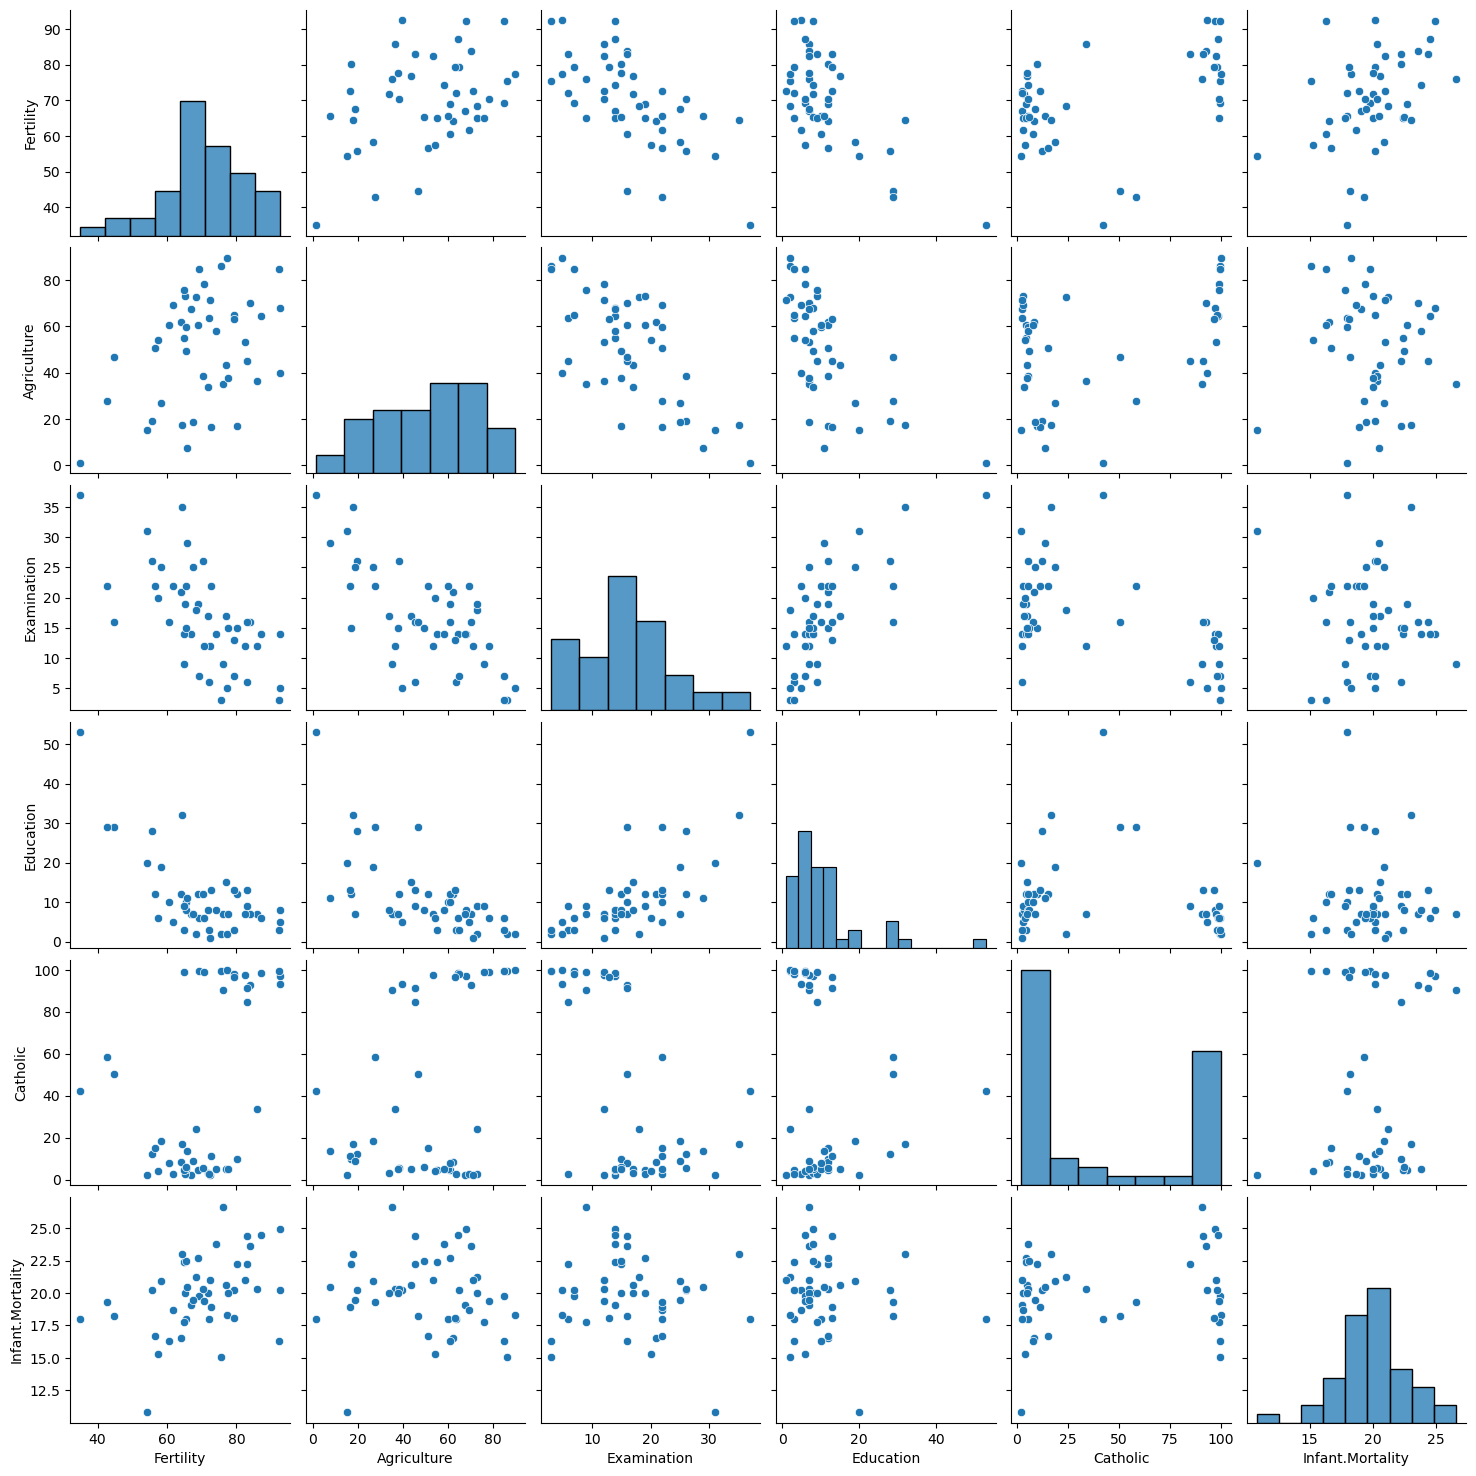

In [17]:
sns.pairplot(swiss)

#### 4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [18]:
from sqlalchemy import create_engine, text
from env import get_connection

In [19]:
def get_db_url(database):
    return get_connection(database)

In [20]:
url = get_db_url('chipotle')
query = text('SELECT * FROM orders')
engine = create_engine(url)
orders = pd.read_sql(query, engine.connect())
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [21]:
# Convert the item_price column into a float
orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')

/var/folders/k8/ltyv8jfd0b54p8nfncshc01w0000gn/T/ipykernel_3691/929225920.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')


In [22]:
# check if item price is total price or per item

chicken_bowl = orders[orders.item_name == 'Chicken Bowl']
chicken_bowl.sort_values('quantity', ascending = False)

,id,order_id,quantity,item_name,choice_description,item_price
409,410,178,3,Chicken Bowl,"[[Fresh Tomato Salsa (Mild), Tomatillo-Green Chili Salsa (Medium), Roasted Chili Corn ...",32.94
1514,1515,616,3,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",26.25
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98
4435,4436,1767,2,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Pinto Beans, Cheese, Lettuce]]",17.50
415,416,181,2,Chicken Bowl,[Tomatillo Red Chili Salsa],17.50
...,...,...,...,...,...,...
1839,1840,745,1,Chicken Bowl,"[[Roasted Chili Corn Salsa (Medium), Tomatillo-Red Chili Salsa (Hot), Fresh Tomato Sal...",8.49
1848,1849,749,1,Chicken Bowl,"[Tomatillo Green Chili Salsa, [Rice, Black Beans, Sour Cream, Cheese]]",8.75
1851,1852,750,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Cheese, Sour Cream, Lettuce]]",8.75
1852,1853,751,1,Chicken Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice]]",8.75


In [23]:
best_sellers = orders.groupby('item_name').quantity.sum().nlargest(4)
best_sellers

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Name: quantity, dtype: int64

In [24]:
# revenue produced by 4 highest selling items.

revenue = orders[orders.item_name.isin(best_sellers.index)].groupby('item_name').item_price.sum()
revenue

item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Chips and Guacamole    2201.04
Steak Burrito          3851.43
Name: item_price, dtype: float64

In [25]:
revenue = revenue.sort_values(ascending = False).reset_index()
revenue

,item_name,item_price
0,Chicken Bowl,7342.73
1,Chicken Burrito,5575.82
2,Steak Burrito,3851.43
3,Chips and Guacamole,2201.04


Text(0.5, 0.98, 'Revenue from Top 4 selling Items')

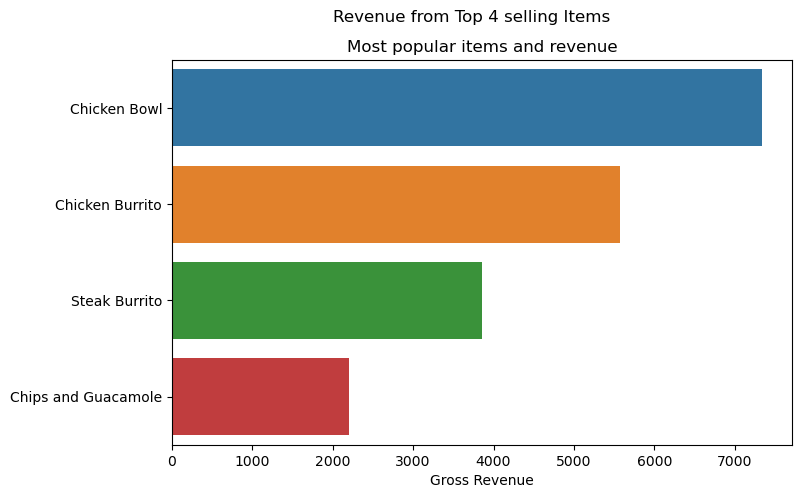

In [26]:
plt.figure(figsize = (8, 5))
sns.barplot(y = 'item_name', x = 'item_price', data = revenue)
plt.title('Most popular items and revenue')

plt.ylabel("") # to get remove the column_name
plt.xlabel("Gross Revenue")
plt.suptitle("Revenue from Top 4 selling Items")


5. Load the sleepstudy data and read it's documentation. 

In [27]:
data('sleepstudy', show_doc = True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [28]:
sleepstudy = data('sleepstudy')
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [29]:
# Format the 'Subject' values
sleepstudy['Subject'] = 'Subject_' + sleepstudy.Subject.astype(str) 

<Axes: xlabel='Days', ylabel='Reaction'>

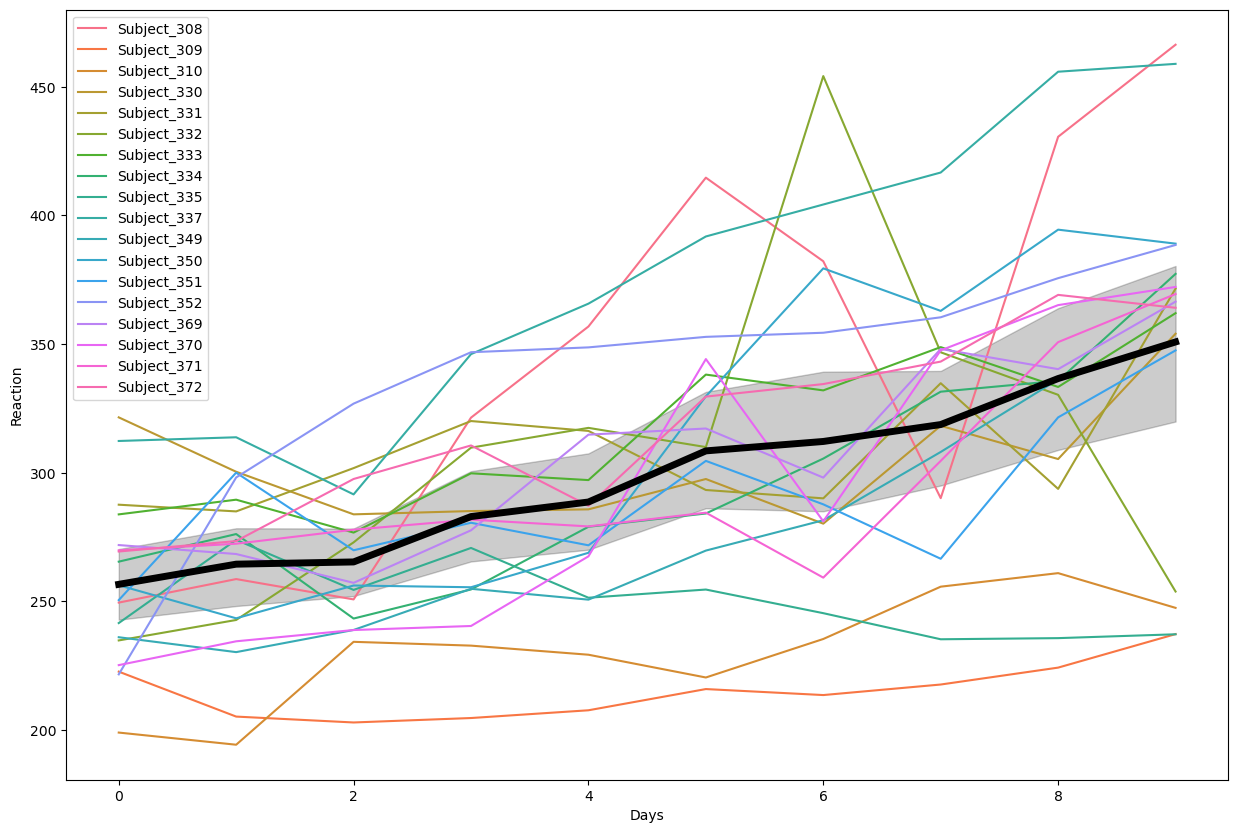

In [30]:
plt.figure(figsize=(15, 10))

sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction',  hue = 'Subject')
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'black', linewidth = 5)